# Course 1: Classification and Vector Spaces
# Assignment 1: Logistic Regression


Welcome to week one of this specialization. You will learn about logistic regression. Concretely, you will be implementing logistic regression for sentiment analysis on tweets. Given a tweet, you will decide if it has a positive sentiment or a negative one. Specifically you will:

- Learn how to extract features for logistic regression given some text
- Implement logistic regression from scratch
- Apply logistic regression on a natural language processing task
- Test using your logistic regression
- Perform error analysis
We will be using a data set of tweets. Hopefully you will get more than 99% accuracy.
Run the cell below to load in the packages.

## Import functions and data


In [1]:
%%capture
%run lecture2.ipynb

In [2]:
# Import tqdm for notebooks
from tqdm.notebook import tqdm
from ipywidgets import IntProgress

## Prepare the data

The twitter_samples contains subsets of 5,000 positive tweets, 5,000 negative tweets, and the full set of 10,000 tweets.
- If you used all three datasets, we would introduce duplicates of the positive tweets and negative tweets.
- You will select just the five thousand positive tweets and five thousand negative tweets.

In [3]:
# Split both sets into training and testing sets
# 80% training, 20% testing

pos_train = pos_tweets[:int(0.8*len(pos_tweets))]
neg_train = neg_tweets[:int(0.8*len(neg_tweets))]
pos_test = pos_tweets[int(0.8*len(pos_tweets)):]
neg_test = neg_tweets[int(0.8*len(neg_tweets)):]

train_x = pos_train + neg_train
test_x = pos_test + neg_test

# Create the label numpy array
train_y = np.append(np.ones(len(pos_train)), np.zeros(len(neg_train)))
test_y = np.append(np.ones(len(pos_test)), np.zeros(len(neg_test)))


In [4]:
# Print lengths and shapes
print('Training set:', len(train_x), 'tweets')
print('Testing set:', len(test_x), 'tweets')
print('Training set:', type(train_x))
print('Testing set:', type(test_x))


Training set: 8000 tweets
Testing set: 2000 tweets
Training set: <class 'list'>
Testing set: <class 'list'>


In [5]:
# Build freqs for positive tweets
freqs = build_freqs(train_x, train_y)
print(len(freqs))
print(type(freqs))

8430
<class 'dict'>


## Logistic Regression
### Sigmoid

In [6]:
def sigmoid(z):
    """
    Input:
    - z: input (scalar or array)
    Output:
    - sigmoid(z): sigmoid of z
    """
    return 1/(1+np.exp(-z))

### Logistic regression: regression and a sigmoid
Logistic regression takes a regular linear regression, and applies a sigmoid to the output of the linear regression.

### Logistic regression: cost and gradient
The cost function used for logistic regression is the average of the log loss across all training examples

## Instructions: Implement gradient descent function

In [7]:
def gradientDescent(x, y, theta, alpha, num_iters, cost_history):
    '''
    Input:
        x: matrix of features which is (m,n+1)
        y: corresponding labels of the input matrix x, dimensions (m,1)
        theta: weight vector of dimension (n+1,1)
        alpha: learning rate
        num_iters: number of iterations you want to train your model for
    Output:
        J: the final cost
        theta: your final weight vector
    Hint: you might want to print the cost to make sure that it is going down.
    '''
    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # get 'm', the number of rows in matrix x
    m = x.shape[0]
    
    for i in tqdm(range(0, num_iters)):
        
        # get z, the dot product of x and theta
        z = np.dot(x,theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = -1./m * (np.dot(y.transpose(), np.log(h)) + np.dot((1-y).transpose(),np.log(1-h)))    

        # update the weights theta
        theta = theta - (alpha/m) * np.dot(x.transpose(),(h-y))
        print(theta)
        cost_history.append(J)
        
    ### END CODE HERE ###
    J = float(J)
    return J, theta



In [8]:
np.random.seed(1)
tmp_x = np.append(np.ones((10, 1)), np.random.randn(10, 2) * 2000, axis=1)
tmp_y = (np.random.randn(10, 1) > 0.35).astype(float)

print(tmp_x)
print(tmp_y)

[[ 1.00000000e+00  3.24869073e+03 -1.22351283e+03]
 [ 1.00000000e+00 -1.05634350e+03 -2.14593724e+03]
 [ 1.00000000e+00  1.73081526e+03 -4.60307739e+03]
 [ 1.00000000e+00  3.48962353e+03 -1.52241380e+03]
 [ 1.00000000e+00  6.38078192e+02 -4.98740751e+02]
 [ 1.00000000e+00  2.92421587e+03 -4.12028142e+03]
 [ 1.00000000e+00 -6.44834408e+02 -7.68108709e+02]
 [ 1.00000000e+00  2.26753888e+03 -2.19978253e+03]
 [ 1.00000000e+00 -3.44856415e+02 -1.75571684e+03]
 [ 1.00000000e+00  8.44274934e+01  1.16563043e+03]]
[[0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]]


  0%|          | 0/700 [00:00<?, ?it/s]

[[1.00000000e-09]
 [7.63844982e-07]
 [5.90742147e-07]]
[[1.99762643e-09]
 [1.52628858e-06]
 [1.17864849e-06]]
[[2.99288802e-09]
 [2.28733572e-06]
 [1.76372961e-06]]
[[3.98579347e-09]
 [3.04699130e-06]
 [2.34599606e-06]]
[[4.97635143e-09]
 [3.80526019e-06]
 [2.92545835e-06]]
[[5.96457056e-09]
 [4.56214727e-06]
 [3.50212695e-06]]
[[6.95045945e-09]
 [5.31765739e-06]
 [4.07601230e-06]]
[[7.93402669e-09]
 [6.07179537e-06]
 [4.64712480e-06]]
[[8.91528081e-09]
 [6.82456604e-06]
 [5.21547481e-06]]
[[9.89423033e-09]
 [7.57597419e-06]
 [5.78107266e-06]]
[[1.08708837e-08]
 [8.32602461e-06]
 [6.34392864e-06]]
[[1.18452495e-08]
 [9.07472206e-06]
 [6.90405302e-06]]
[[1.28173360e-08]
 [9.82207129e-06]
 [7.46145600e-06]]
[[1.37871517e-08]
 [1.05680770e-05]
 [8.01614778e-06]]
[[1.47547049e-08]
 [1.13127440e-05]
 [8.56813849e-06]]
[[1.57200040e-08]
 [1.20560769e-05]
 [9.11743826e-06]]
[[1.66830573e-08]
 [1.27980804e-05]
 [9.66405716e-06]]
[[1.76438730e-08]
 [1.35387593e-05]
 [1.02080052e-05]]
[[1.860245

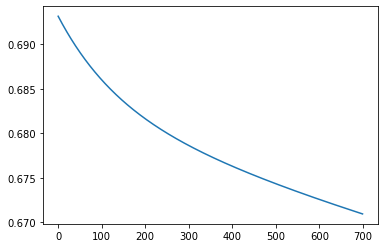

In [9]:
np.random.seed(1)
tmp_X = np.append(np.ones((10, 1)), np.random.rand(10, 2) * 2000, axis=1)
tmp_Y = (np.random.rand(10, 1) > 0.35).astype(float)

cost_history = []
tmp_J, tmp_theta = gradientDescent(tmp_X, tmp_Y, np.zeros((3, 1)), 1e-8, 700, cost_history)
print(f"The cost after training is {tmp_J:.8f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(tmp_theta)]}")

cost_history = np.array(cost_history).flatten()
plt.plot(cost_history)

## Extracting the features from the tweets
Given a list of tweets, extract the features and store them in a matrix. You will extract two features.
- The first feature is the number of positive words in a tweet.
- The second feature is the number of negative words in a tweet.
Then train your logistic regression classifier on these features.
Test the classifier on a validation set.

In [10]:
def extract_feature(tweet, freqs):
    '''
    Input:
        - tweet: a string
        - freqs: a dictionary of frequencies of the type
        {
            "word": {
                "positive": int,
                "negative": int
            }
        }
    Output:
        - feature_vector: a numpy array of features of dimension (1,3)
    '''
    tokens = process_text(tweet)
    x = np.zeros((1, 3))

    x[0, 0] = 1
    for token in tokens:
        if token in freqs:
            x[0, 1] += freqs[token]['positive']
            x[0, 2] += freqs[token]['negative']

    assert x.shape == (1, 3)
    return x

In [11]:
# Check the feature vector for a tweet
tmp1 = extract_feature(train_x[0], freqs)
print(tmp1)

[[1.000e+00 3.109e+03 6.100e+01]]


## Training the model
To train the model:

- Stack the features for all training examples into a matrix X.
- Call gradientDescent, which you've implemented above.

In [12]:
X = np.zeros((len(train_x), 3))
for i in tqdm(range(len(test_x))):
    X[i, :] = extract_feature(train_x[i], freqs)

Y = train_y

  0%|          | 0/2000 [00:00<?, ?it/s]

In [13]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_feature(train_x[i], freqs)

# training labels corresponding to X
Y = train_y


In [14]:
print(X)
print(Y)

[[1.000e+00 3.109e+03 6.100e+01]
 [1.000e+00 3.705e+03 4.440e+02]
 [1.000e+00 3.119e+03 1.160e+02]
 ...
 [1.000e+00 1.440e+02 7.920e+02]
 [1.000e+00 2.070e+02 3.901e+03]
 [1.000e+00 1.870e+02 3.985e+03]]
[1. 1. 1. ... 0. 0. 0.]


In [94]:
# Apply gradient descent
cost_history = []
# J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500, cost_history)
# print(f"The cost after training is {J:.8f}.")
# print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

  0%|          | 0/1500 [00:00<?, ?it/s]

[[ 5.00000000e-10  5.00000000e-10  5.00000000e-10 ... -5.00000000e-10
  -5.00000000e-10 -5.00000000e-10]
 [ 7.24311500e-07  7.24311500e-07  7.24311500e-07 ... -7.24311500e-07
  -7.24311500e-07 -7.24311500e-07]
 [ 9.77974188e-07  9.77974188e-07  9.77974188e-07 ... -9.77974188e-07
  -9.77974188e-07 -9.77974188e-07]]
[[ 9.99259471e-10  9.99259471e-10  9.99259471e-10 ... -9.99259471e-10
  -9.99259471e-10 -9.99259471e-10]
 [ 1.44757364e-06  1.44757364e-06  1.44757364e-06 ... -1.44757364e-06
  -1.44757364e-06 -1.44757364e-06]
 [ 1.95384754e-06  1.95384754e-06  1.95384754e-06 ... -1.95384754e-06
  -1.95384754e-06 -1.95384754e-06]]
[[ 1.49777983e-09  1.49777983e-09  1.49777983e-09 ... -1.49777983e-09
  -1.49777983e-09 -1.49777983e-09]
 [ 2.16978808e-06  2.16978808e-06  2.16978808e-06 ... -2.16978808e-06
  -2.16978808e-06 -2.16978808e-06]
 [ 2.92762452e-06  2.92762452e-06  2.92762452e-06 ... -2.92762452e-06
  -2.92762452e-06 -2.92762452e-06]]
[[ 1.99556248e-09  1.99556248e-09  1.99556248e-09 ..

KeyboardInterrupt: 

In [95]:
J = 0.24216529
theta = [7e-08, 0.0005239, -0.00055517]

## Tweet prediction

In [101]:
def predict_tweet(tweet, theta, freqs):
    '''
    Input:
        - tweet: a string
        - theta: a numpy array of weights of dimension (1,3)
        - freqs: a dictionary of frequencies of the type
        {
            "word": {
                "positive": int,
                "negative": int
            }
        }
    Output:
        - prediction: a float
    '''
    x = extract_feature(tweet, freqs)
    z = np.dot(x, theta)
    prediction = sigmoid(z)
    # Return flat prediction
    return np.squeeze(prediction)

In [104]:
# Predict 10 random tweets
for i in range(10):
    idx = np.random.randint(0, len(test_x))
    tweet = test_x[idx]
    prediction = predict_tweet(tweet, theta, freqs)
    print("Tweet:", tweet)
    print("Prediction:", prediction)


Tweet: Me and my friends never talk ess-aych-eye-tee about anyone :)
Prediction: 0.8238487737638809
Tweet: Hate being the messenger :(
Prediction: 0.11299084558460407
Tweet: @junior_jones it was good as always 😀Flying back today though :(
Prediction: 0.12059319801699146
Tweet: 3 days without talking with Bae :(
Prediction: 0.117450518622758
Tweet: 24 hours not enough :(
Prediction: 0.11439414552107792
Tweet: @michaelsutthako morning , i miss you :( :*
Prediction: 0.10506042699367006
Tweet: @RickyBaby321 It's not forwarding Richard...it's 'follow' :)
Prediction: 0.8293606842787128
Tweet: @chewy4cutie but you can with me :)
Prediction: 0.8248608247734253
Tweet: 15 Days ago Danny took my wig and put it onto mark's head I want to go back there @thescript @TheScript_Danny :( ♥ https://t.co/9ojA3FPxKF
Prediction: 0.10866962342466999
Tweet: Some times I like this style :| but now I didn't liked it :( http://t.co/jjSI8VScPL
Prediction: 0.11351574446987017


## Checking model accuracy

In [109]:
def test_logistic_regression(test_x, test_y, theta, freqs):
    '''
    Input:
        - test_x: a list of strings
        - test_y: a list of labels
        - theta: a numpy array of weights of dimension (1,3)
        - freqs: a dictionary of frequencies of the type
        {
            "word": {
                "positive": int,
                "negative": int
            }
        }
    Output:
        - accuracy: a float
    '''
    y_hat = []
    for tweet in test_x:
        y_pred = predict_tweet(tweet, theta, freqs)
        if y_pred > 0.5:
            y_hat.append(1)
        else:
            y_hat.append(0)
    accuracy = (y_hat==np.squeeze(test_y)).sum()/len(test_x)
    return accuracy

In [111]:
print("The accuracy of the model is", test_logistic_regression(test_x, test_y, theta, freqs))

The accuracy of the model is 0.9955
